# Ausgleichs-Polynome

Das im Beitrag zur Linearen Regressionen beschriebene Verfahren lässt sich leicht auf Polynome höheren Grades übertragen. Dies liegt an der einfachen "standardisierten" Form dieser Sorte Funktionen. Ein Polynom vom Grad $n$ hat die Gestalt $$P(x) = \sum_{j=0}^n a_j x^j = a_0 + a_1x + a_x^2 + \ldots + a_n x^n.$$
Unsere Distanzfunktion hat zu gegebenen $N$ Wertepaaren $x_k, y_k$ dann die einfache Gestalt
$$D(P) = P(a_j) = \sum_{k=1}^N (\sum_{j=0}^n (a_j x_k^j) - y_k)^2.$$
Wie im linearen Fall suchen wir nun das Polynom $P$ und damit Koeffizienten $a_0,a_1,\ldots,a_n$, so dass $D$ minimal ist. Für diese Koeffizienten $a_j$ muss der Gradient von $D$ verschwinden, d.h. $\nabla D (a_k) = 0$. Die Berechnung dieses Gradienten ist aber wegen der Struktur der Polynome recht einfach, und es muss für alle $m=0,1,\ldots,n$ gelten:
$$ \frac{\partial D}{\partial a_m} = \sum_{k=1}^N 2x_k^m (\sum_{j=0}^n (a_jx_k^j) -y_k) = 0$$
Wir können die Konstante 2 streichen, bringen die von $a_j$ unabhängigen Terme auf die rechte Seite und sortieren die Summen um. Wir erhalten $n+1$ Gleichungen für die Koeffizienten des Polynoms:
$$\sum_{j=0}^n (\sum_{k=1}^N x_k^{j+m}) a_j = \sum_{k=1}^N x_k^m y_k \;\;\; \text{für}\; m = 1,\dots, n.$$
Die ist ein affines Gleichungssystem der Gestalt $A a = b$ mit Koeffizienten
$$A = (a_{ik}) = (\sum_{j=1}^N x_n^{ik}), b = (b_i) = \sum_{n=1}^N x_n^i y_n.$$

Dieses Gleichungssystem besitzt eine eindeutige Lösung, und die Python-Bibliothek `NumPy` besitzt im Bereich der Linearen Algebra eine entsprechende Funktion.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Implementierung der Berechnung der Ausgleichs-Polynome

In [13]:
def koeffizienten(x, y, grad):
    A = np.array([[np.sum(x**(n + g)) for g in range(grad + 1)] for n in range(grad + 1) ])
    # Die rechte Seite des Gleichungssystems
    b = np.array([np.sum(x**n *y) for n in range(grad + 1)])
    return A,b

def poly_reg(x, y, grad):
    A,b = koeffizienten(x, y, grad)
    return np.linalg.solve(A,b)

def poly_gen(a:np.ndarray):
    """Erzeugt ein Polynom mit den Koeffizienten aus a"""
    return (lambda x: np.sum([a * x**k for k,a in enumerate(a)]))

def D(x, y, f):
    return np.sum((f(x) - y)**2) 

def poly_plot(x, y, grad):
    
    plt.figure( figsize=(6, 4))
    plt.ylim(min(0,np.min(y) - 3),np.max(y)+3)
    plt.xlabel('$x$')
    plt.ylabel('$P(x)$')
    plt.grid(True)
    plt.scatter(x,y,color='red')
    P = poly_gen(grad)
    xp = np.linspace(np.min(x),np.max(x),100)
    yp = [P(x) for x in xp]
    plt.plot(xp,yp) ;


#### Der Spezialfall N=1 $\rightarrow$ Die Lineare Regression

Wir betrachten noch einmal unser Beispiel aus der Linearen Regression und überprüfen, ob dasselbe Ergebnis harauskommt.

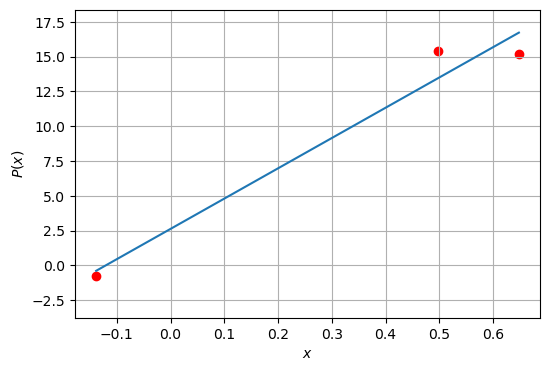

In [15]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 3, n_features = 1, noise = 5,  random_state = 42)
X = X.flatten()
coeff = poly_reg(X,y,1)

poly_plot(X,y,coeff)

## Quadratische Polynome

### Drei Punkte lassen sich durch ein Polynom 2. Grades perfekt verbinden

Verwenden wir Polynome vom Grad höher als 1, so lassen sich die Punkte noch besser approximieren. Allgemein können wir $N$ Punkte durch ein Polynom vom Grad $N-1$ exakt verbinden. 
Unsere drei Punkte sollten sich also durch ein quadratsches Polynom verbinden lassen. Das Prinzip ist dasselbe: Die Minimierung der Distanzfunktion führt auf ein Gleichungssystem für die Koeffizienten des Polynoms.

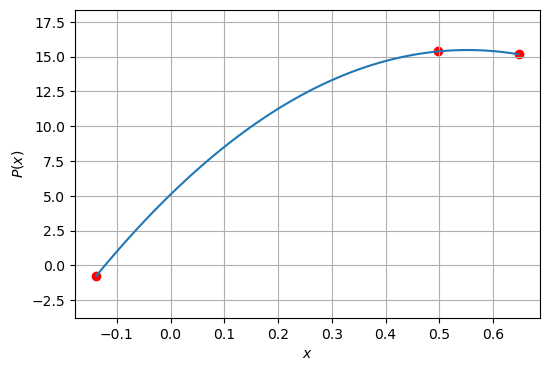

In [16]:
X, y = make_regression(n_samples = 3, n_features = 1, noise = 5,  random_state = 42)
X = X.flatten()

coeff = poly_reg(X, y, 2)

poly_plot(X, y, coeff)


### Polynome höheren Grades

Tatsächlich zeigt die Analysis, dass sich alle ("glatten") Funktionen **in einem begrenzten Bereich** beliebig genau durch Polynome approximieren lassen ([s. "Taylorreihe" bei Wikipedia](https://de.wikipedia.org/wiki/Taylorreihe)). Erst dadurch sind Berechnungen von Funktionen wie Sinus oder Exponential-Funktion durch Computer erst möglich, da diese nur addieren und multiplizieren konnen. Wir approximieren hier einmal eine Sinusfunktion durch ein Polynome.

# Begriffe 2: Overfitting

<Figure size 800x560 with 0 Axes>

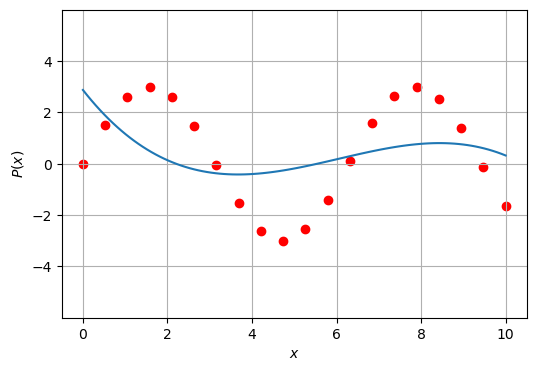

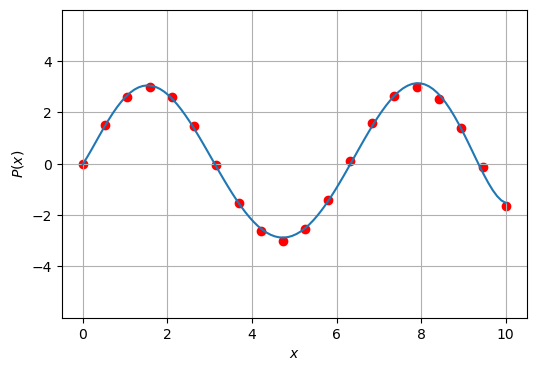

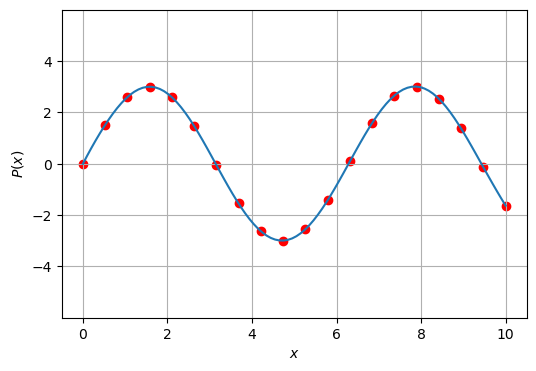

In [20]:
N = 20
X = np.linspace(0,10,N) 
y = 3 * np.sin(np.linspace(0, 10, N))

plt.figure( figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')

for g in range(3, 12, 3):
    coeff = poly_reg(X, y, g)
    poly_plot(X,y,coeff);


## Overfitting

Mt höhergradigen Polynomen lässt sich die Differenzfunktion immer weiter verkleinern. Dies ist aber nicht immer wünschenswert, denn mit jeder Erhöhung des Grads des Polynoms entsteht ein neuer Parameter. Dabei entstehen kleine Abweichungen oft nur durch Messfehler bei der Datenerhebung. In der Regel ist ein Polynom niedrigen Grades gewünscht, ideal ist eine Ausgleichsgrade.

Dieses __Overfitting__ (_Überanpassung_) ist ein bekanntes Problem der KI. Es liegt am Anwender der Algorithmen, solches Overfitting zu vermeiden.

###  Beispiel für Overfitting

 Wir demonstrieren  Overfitting durch hochgradige Polynome an verrauschten Daten, die eigentlich auf einer quadratischen Parabel liegen.

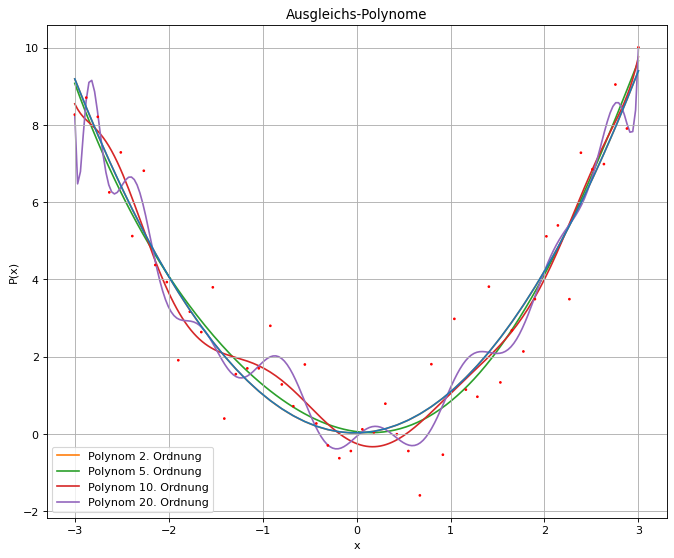

In [41]:
N = 50
x = np.linspace(-3,3,N)
y = x ** 2
noise = np.random.normal(0, 1, N)
y += noise


fig = plt.figure( figsize=(10, 8), dpi=80)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('x')
ax.set_ylabel('P(x)')
ax.grid()
ax.set_title("Ausgleichs-Polynome")

ax.scatter(x,y,color='red', marker='o', s = [2 for n in range(len(x))])

P = poly_gen(np.polyfit(x,y,2)[::-1]) 
ax.plot(x,[P(x) for x in x])

for g in (2,5,10,20):
    p = poly_gen(np.polyfit(x, y, g)[::-1])
    xs = np.linspace(-3,3,200)    
    ax.plot(xs,[p(x) for x in xs], label = f'Polynom {g}. Ordnung',zorder=0)

ax.legend()
plt.show()